## VaR and ES Calculator (for Short Risk Reversal)

In [15]:
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

from random import seed, gauss

In [16]:
def CallOption(t, S_t, K, T, v, r):
    
    d1 = np.log(S_t/K) + (r + 0.5*v**2)*(T-t)
    d1 = d1/(v*np.sqrt(T-t))
    
    d2 = d1 - v*np.sqrt(T-t)
    
    return S_t*norm.cdf(d1) - K*np.exp(-r*(T-t))*norm.cdf(d2)

def PutOption(t, S_t, K, T, v, r):
    
    d1 = np.log(S_t/K)+(r+0.5*v**2)*(T-t)
    d1 = d1/(v*np.sqrt(T-t))
    
    # By Put-Call Parity, PutPrice = CallPrice - ForwardPrice
    return -S_t*norm.cdf((-1)*d1) + K*np.exp(-r*T)*norm.cdf(-d1+v*np.sqrt(T-t))

In [17]:
t, S_0, T, v, r = 0, 100, 10, 0.4, 0.05
K2, K1 = 95, 105

P = PutOption(t, S_0, K2, T, v, r) - CallOption(t, S_0, K1, T, v, r)
print(f'Price of Bear Risk Reversal: {P: .2f}')

Price of Bear Risk Reversal: -39.91


In [18]:
def VaR_ES(S_0, mu, v, r, H=1, Confidence_Level=0.95, NoSims=10000):
        
    # define bear RR parameters    
    K2, K1, T = 95, 105, 10
    
    # Product price at time 0: 
    V0 = PutOption(0, S_0, K2, T, v, r) - CallOption(0, S_0, K1, T, v, r)
    
    # Computing the prices after h years
    T = T - H
    
    # seed random number generator
    np.random.seed(1)
    
    # Generate Brownian Increments
    Zt = np.random.normal(size=NoSims)
    
    # Corresponding log-normal distribution of underlying at time H
    S_H = S_0*np.exp((mu - 0.5*v**2)*H)*np.exp(Zt*v*(H**0.5))
    
    # Product price at time H:
    VH = PutOption(0, S_H, K2, T, v, r) - CallOption(0, S_H, K1, T, v, r)
    
    # Loss distribution - negative of PnL to positive loss:
    Loss = np.sort(V0 - VH, )
    
    # Extract loss at critical confidence level:
    
    VaR = np.percentile(Loss, 100*Confidence_Level)
    ES = np.mean(Loss[Loss>=VaR])
    
    return VaR, ES, Loss

VaR, ES, Loss = VaR_ES(S_0, 0.1, v, r, H=1, Confidence_Level=0.95, NoSims=1000000)

## Example of plotting a histogram with VaR and ES (for $\sigma$=0.4)

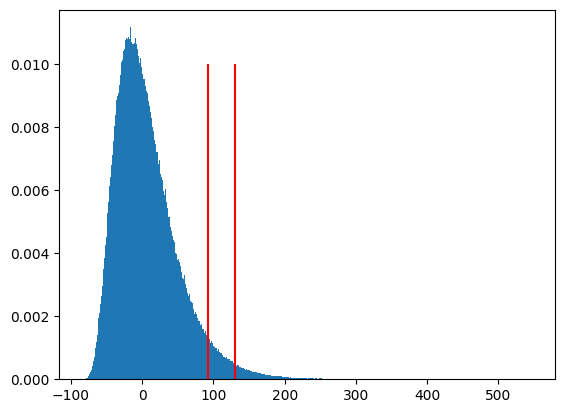

vol = 0.4: VaR = 92.49237780422561, ES = 130.5629374761031


In [20]:
plt.hist(Loss, bins=1000, density=True)
plt.vlines([VaR, ES], ymin=0, ymax=0.01, color='r')
plt.show()

print(f'vol = {v}: VaR = {VaR}, ES = {ES}')

## Further plots for Q6

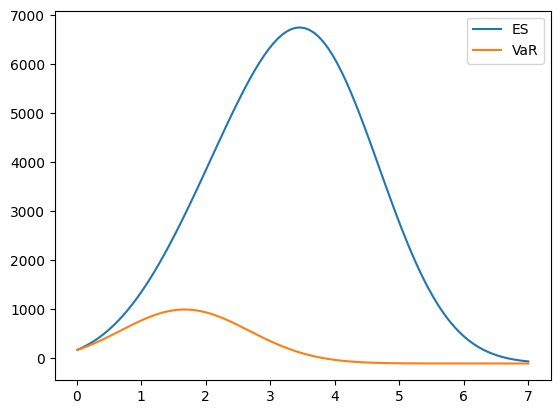

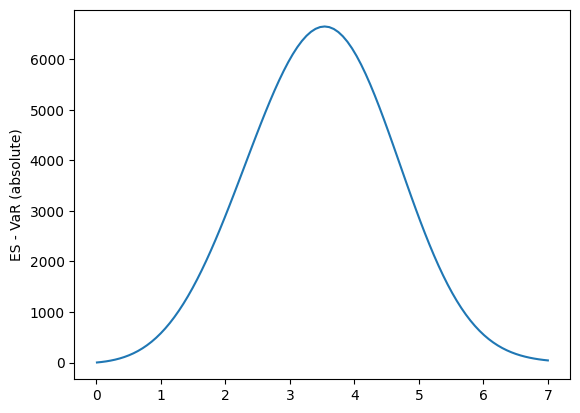

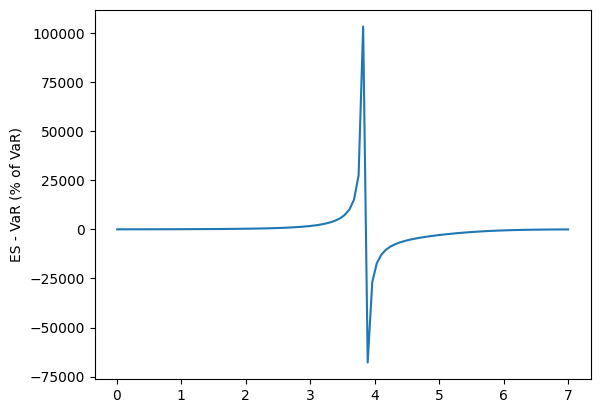

In [10]:
# We scan across a large unrealistic range for vol (1% to 700%)

vol_range = np.linspace(0.01, 7, 100) 
ES_list = []
VaR_list = []

for v in vol_range:
    VaR, ES, Loss = VaR_ES(S_0, 1, v, r, H=1, Confidence_Level=0.95, NoSims=10000)
    VaR_list.append(VaR)
    ES_list.append(ES)
    
plt.plot(vol_range, ES_list, label='ES')
plt.plot(vol_range, VaR_list, label='VaR')

plt.legend()
plt.show()

ES_list = np.array(ES_list)
VaR_list = np.array(VaR_list)


plt.plot(vol_range, ES_list-VaR_list)
plt.ylabel('ES - VaR (absolute)')
plt.show()

plt.plot(vol_range, (ES_list-VaR_list)*100/VaR_list)
plt.ylabel('ES - VaR (% of VaR)')

plt.show()

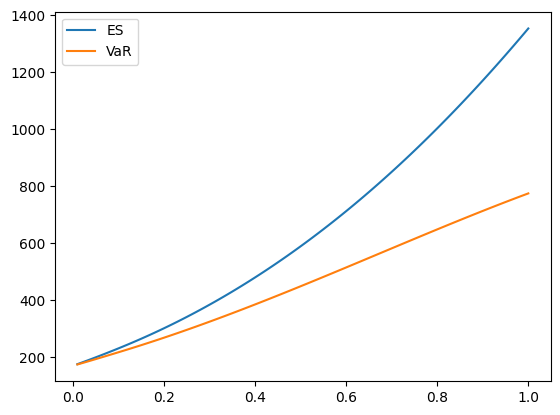

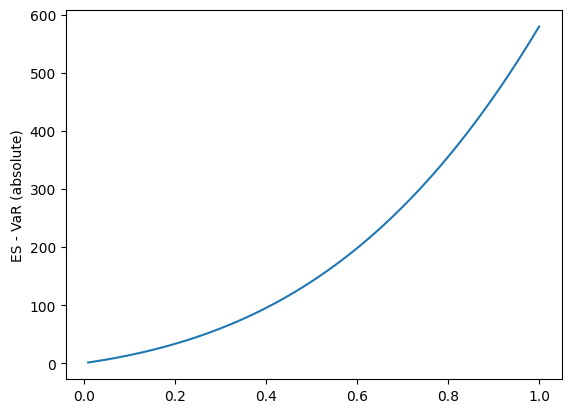

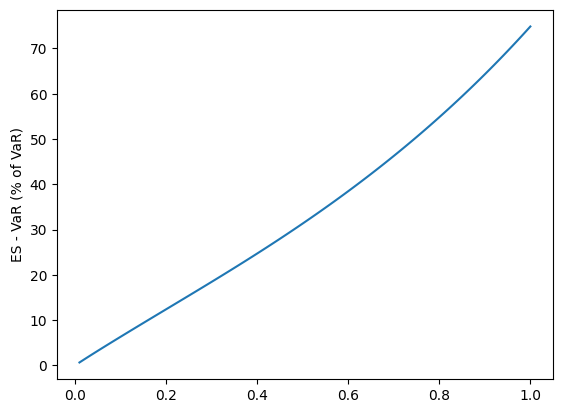

In [11]:
# A more realistic range for annualised vol (1% to 100%)

vol_range = np.linspace(0.01, 1, 100) 
ES_list = []
VaR_list = []

for v in vol_range:
    VaR, ES, Loss = VaR_ES(S_0, 1, v, r, H=1, Confidence_Level=0.95, NoSims=10000)
    VaR_list.append(VaR)
    ES_list.append(ES)
    
plt.plot(vol_range, ES_list, label='ES')
plt.plot(vol_range, VaR_list, label='VaR')

plt.legend()
plt.show()

ES_list = np.array(ES_list)
VaR_list = np.array(VaR_list)


plt.plot(vol_range, ES_list-VaR_list)
plt.ylabel('ES - VaR (absolute)')
plt.show()

plt.plot(vol_range, (ES_list-VaR_list)*100/VaR_list)
plt.ylabel('ES - VaR (% of VaR)')

plt.show()